# Global AI Index: Nations' Innovation, Investment and Implementation Levels

# AI Global Index Dataset - Data Dictionary

| **Field Name**           | **Description**                                                                                                   |
|--------------------------|-------------------------------------------------------------------------------------------------------------------|
| **Country**              | Name of the country being analyzed.                                                                               |
| **Talent**               | Indicator measuring the availability of skilled AI practitioners.                                                |
| **Infrastructure**       | Indicator assessing the reliability and scale of access to essential infrastructure (e.g., electricity, internet).|
| **Operating Environment** | Indicator focusing on the regulatory context and public perception of AI.                                        |
| **Research**             | Indicator reflecting the extent of AI-related research and academic publications.                                 |
| **Development**          | Indicator measuring the creation of fundamental AI platforms and algorithms.                                     |
| **Government Strategy**  | Indicator assessing government commitment to AI through spending and strategic planning.                           |
| **Commercial**           | Indicator evaluating AI-related startup activity, investment, and business initiatives.                           |
| **Total Score**          | The overall score of a country based on the seven indicators.                                                    |
| **Region**               | Geographical region of the country (e.g., Americas, Europe, Asia-Pacific).                                       |
| **Cluster**              | Grouping based on similarities in AI development and implementation among countries.                              |
| **Income Group**         | Economic classification of the country (e.g., low, middle, high income).                                         |
| **Political Regime**     | Type of government in the country (e.g., democratic, authoritarian).                                             |

## Summary Statistics

- **Number of Countries**: 62
- **Unique Values in Each Indicator**:
  - **Talent**: Ranges from 0.00 to 100.00
  - **Infrastructure**: Ranges from 0.00 to 100.00
  - **Operating Environment**: Ranges from 0.00 to 100.00
  - **Research**: Ranges from 0.00 to 100.00
  - **Development**: Ranges from 0.00 to 100.00
  - **Government Strategy**: Ranges from 0.00 to 100.00
  - **Commercial**: Ranges from 0.00 to 100.00
  - **Total Score**sification, regression, clustering)


## Implementation
- **Talent** focuses on the availability of skilled practitioners in artificial intelligence solutions.
- **Infrastructure** assesses the scale of advanced computing infrastructure and semiconductor manufacturing.
- **Operating Environment** focuses on the regulatory context of and public opinion on artificial intelligence.

## Innovation 
- **Research** looks at the quantity and quality of specialist academic and industry research.
- **Development** focuses on the development of new AI models and the application of AI technology in patents across other fields.

## Investment
- **Government Strategy** gauges the depth of commitment from national governments to artificial intelligence; investigating spending and national strategies.
- **Commercial** Ecosystem focuses on the level of startup activity, private investment and business initiatives related to artificial intelligence.

# 1. Import Necessary Libraries

In [238]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

# 2. Read data

In [239]:
# Load the data
path = r"C:\Users\Vinitha\Desktop\MiniProject_3\AI_Index\AI_Index2023.csv"
original = pd.read_csv(path)

In [240]:
df = original.copy()

In [241]:
# Head
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [242]:
# Shape
df.shape

(62, 13)

In [243]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


# 3. Data cleaning and preprocessing

In [244]:
# Check for null values
df.isna().sum()

Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64

In [245]:
# Mapping dictionary
bm_map = {
    'Americas': 1,
    'Europe': 2,
    'Asia-Pacific': 3,
    'Middle East': 4,
    'Africa': 5
}
df['Region'] = df["Region"].map(bm_map)

In [246]:
# Mapping dictionary
bm_map = {
    'Power players': 1,
    'Traditional champions': 2,
    'Rising stars': 3,
    'Waking up': 4,
    'Nascent': 5
}
df['Cluster'] = df["Cluster"].map(bm_map)

In [247]:
# Mapping dictionary
bm_map = {
    'High': 1,
    'Upper middle': 2,
    'Lower middle': 3
}
df['Income group'] = df["Income group"].map(bm_map)

In [248]:
# Selecting the categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Print the categorical features
print("Categorical Features:")
df[categorical_features].head()

Categorical Features:


,Country,Political regime
0,United States of America,Liberal democracy
1,China,Closed autocracy
2,United Kingdom,Liberal democracy
3,Canada,Liberal democracy
4,Israel,Liberal democracy


In [249]:
# Selecting the numerical features
numerical_features = df.select_dtypes(include=['int64','float64']).columns

# Print the categorical features
print("numerical Features:")
df[numerical_features].head()

numerical Features:


,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group
0,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,1,1
1,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3,1,2
2,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2,2,1
3,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,2,1
4,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,3,1


# 4. Exploratory Data Analysis (EDA)

## 4.1 Basic statistics

In [251]:
# Basic statistics of numerical columns
df.describe().round(2)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,16.80,63.50,66.93,16.61,14.82,57.87,6.17,23.91,2.53,3.68,1.47
std,15.21,20.22,20.00,17.41,19.42,26.25,14.03,15.12,1.10,0.84,0.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,7.36,55.86,58.11,3.03,1.20,41.03,0.70,14.80,2.00,3.00,1.00
50%,13.44,65.23,69.50,12.93,9.00,63.93,2.58,23.22,2.00,4.00,1.00
75%,24.57,75.95,80.50,25.41,19.98,77.95,5.31,30.49,3.00,4.00,2.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,5.00,5.00,3.00


## 4.2 Visualizations

### Univariate analysis

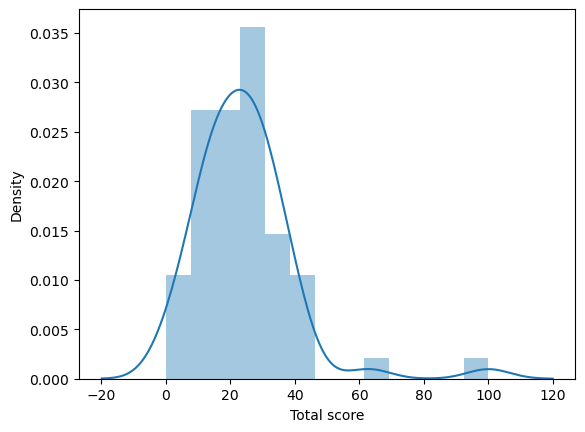

In [252]:
# Distribution of Total score
sns.distplot(df['Total score']);

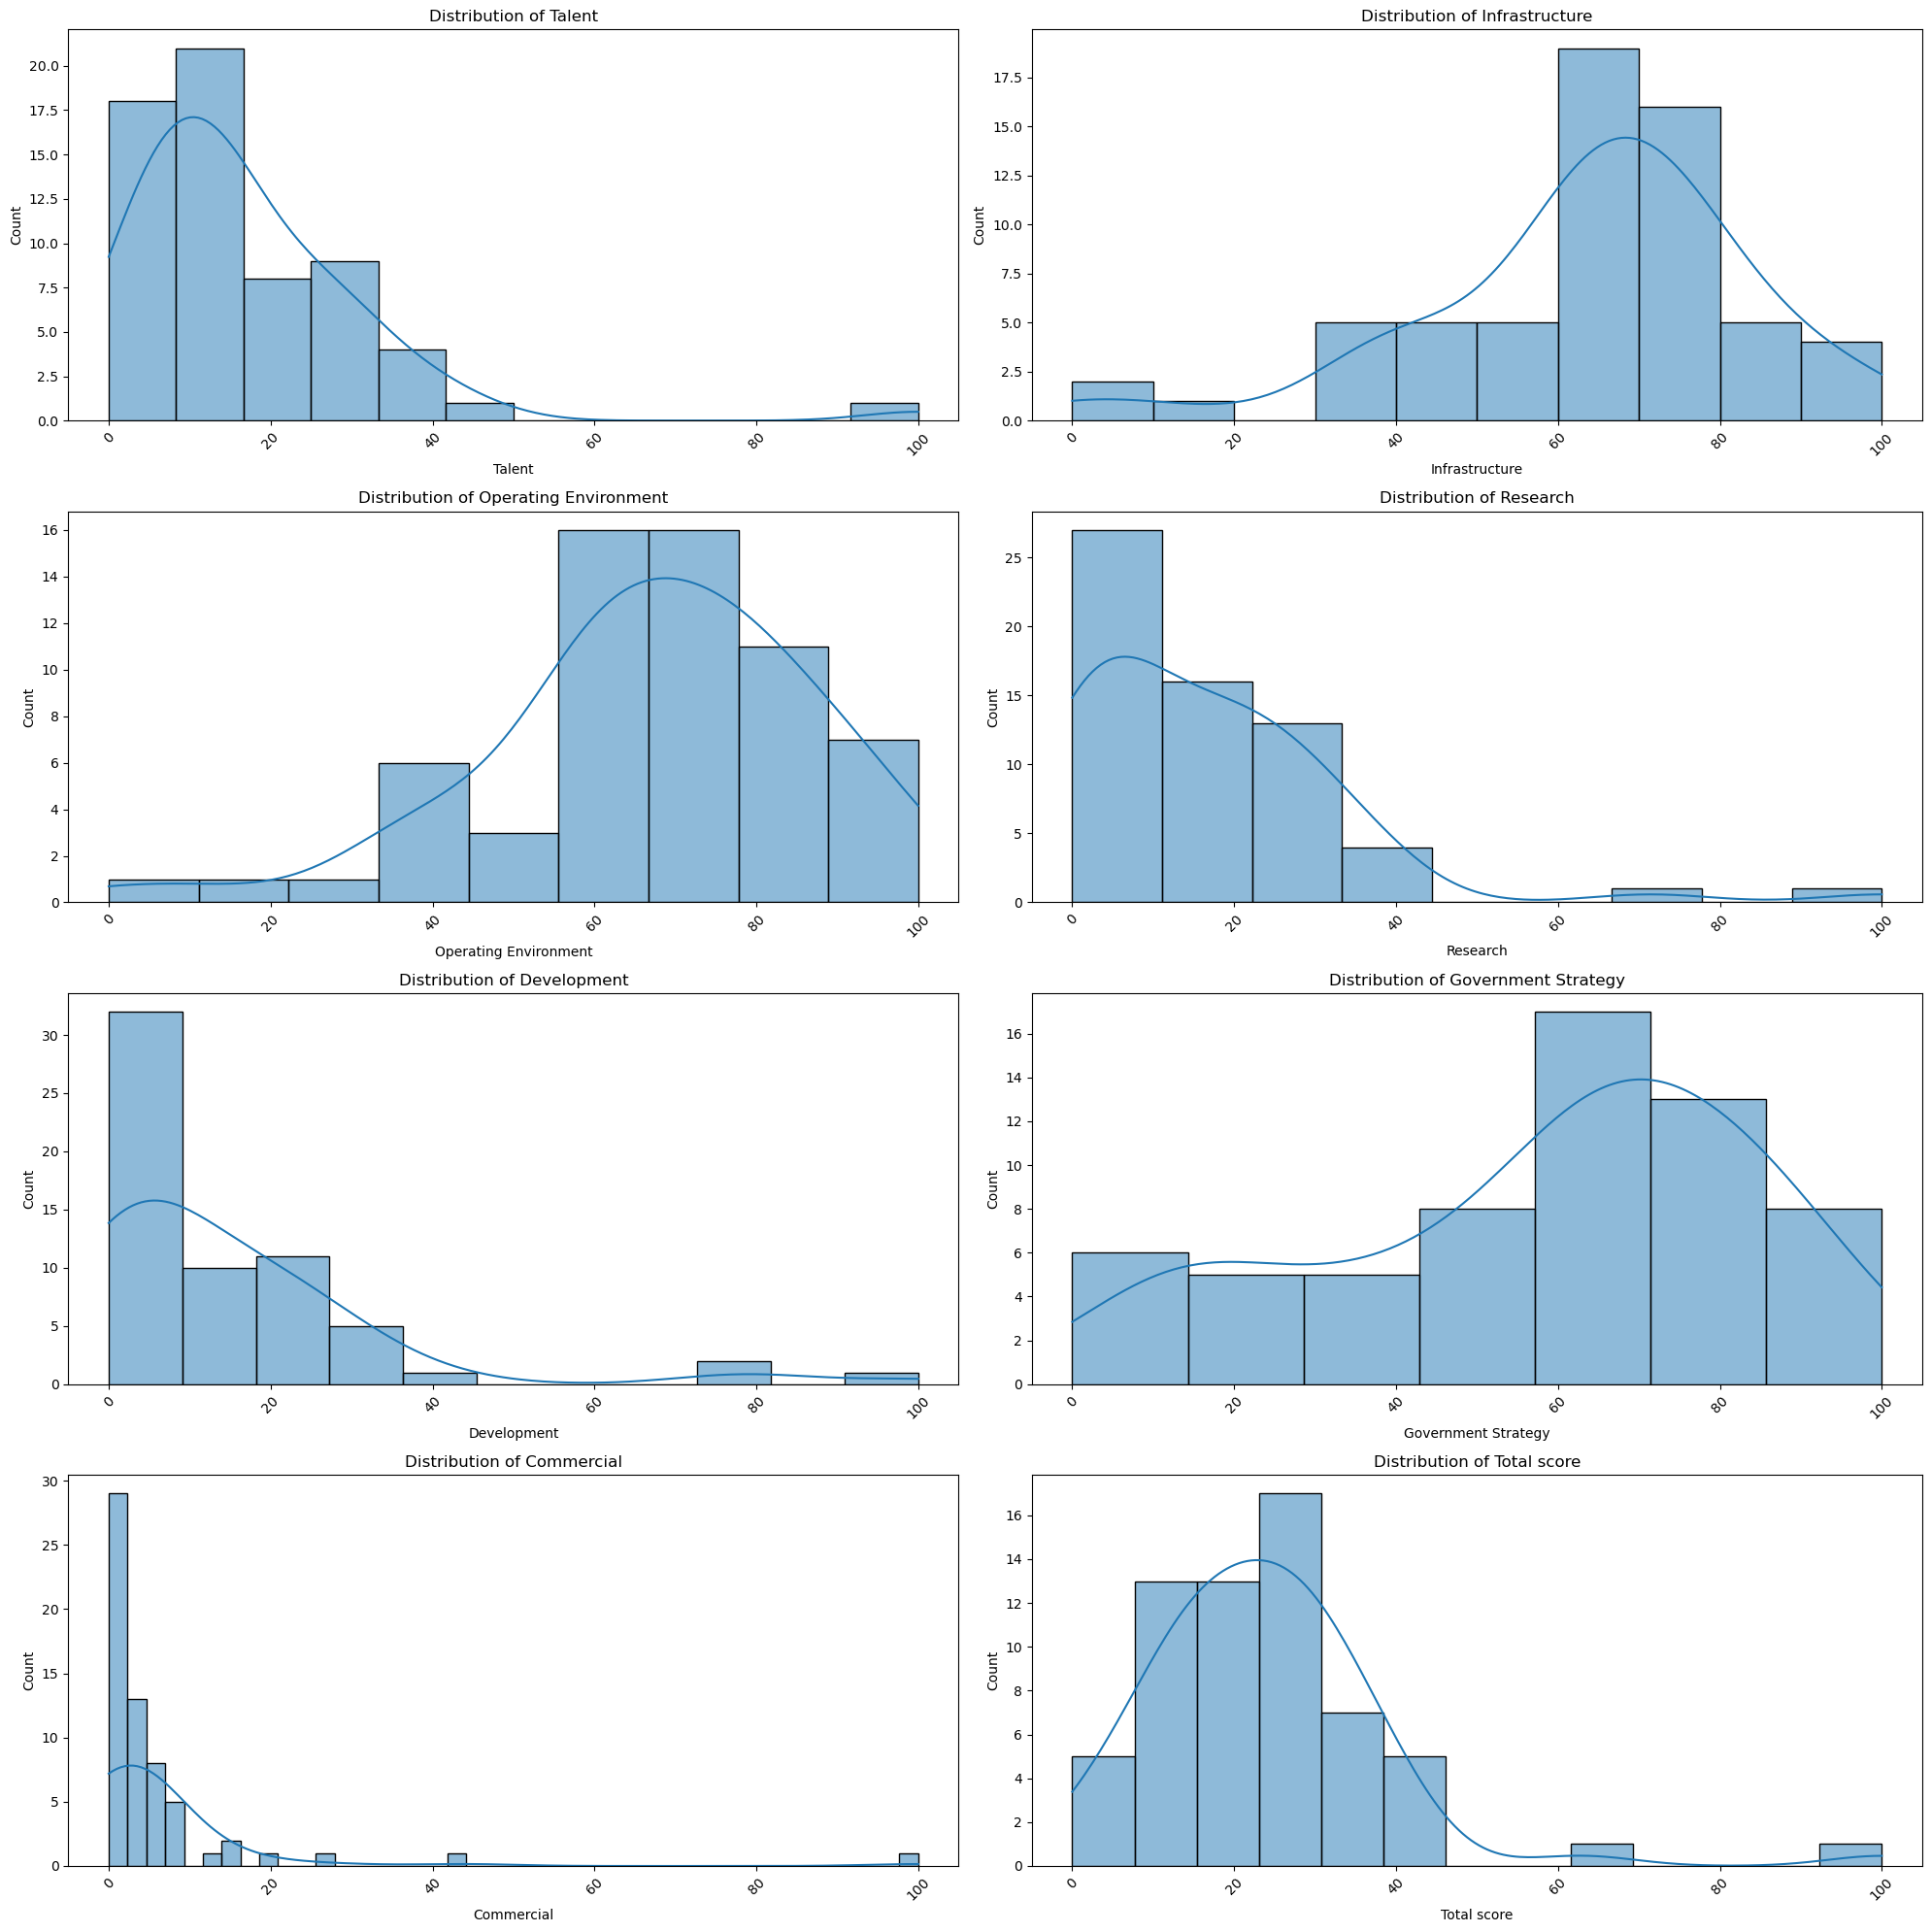

In [253]:
# Features to plot
features = ['Talent', 'Infrastructure', 'Operating Environment',
            'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']

# Create subplots
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for feature in features:
    ax = plt.subplot(4, 2, plotnumber)  # Adjusted the grid size for better layout
    sns.histplot(df[feature], kde=True, palette='viridis')  # Using histplot instead of distplot
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
    plotnumber += 1

plt.tight_layout()  # Adjusts subplot parameters for better spacing
plt.show()

<Axes: xlabel='Total score', ylabel='Density'>

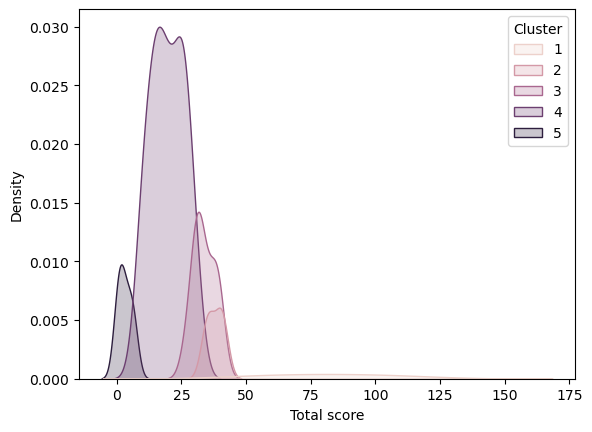

In [254]:
# Density of Total score based on clusters
sns.kdeplot(data=df, x='Total score', shade=True, hue='Cluster')

### Bivariate analysis

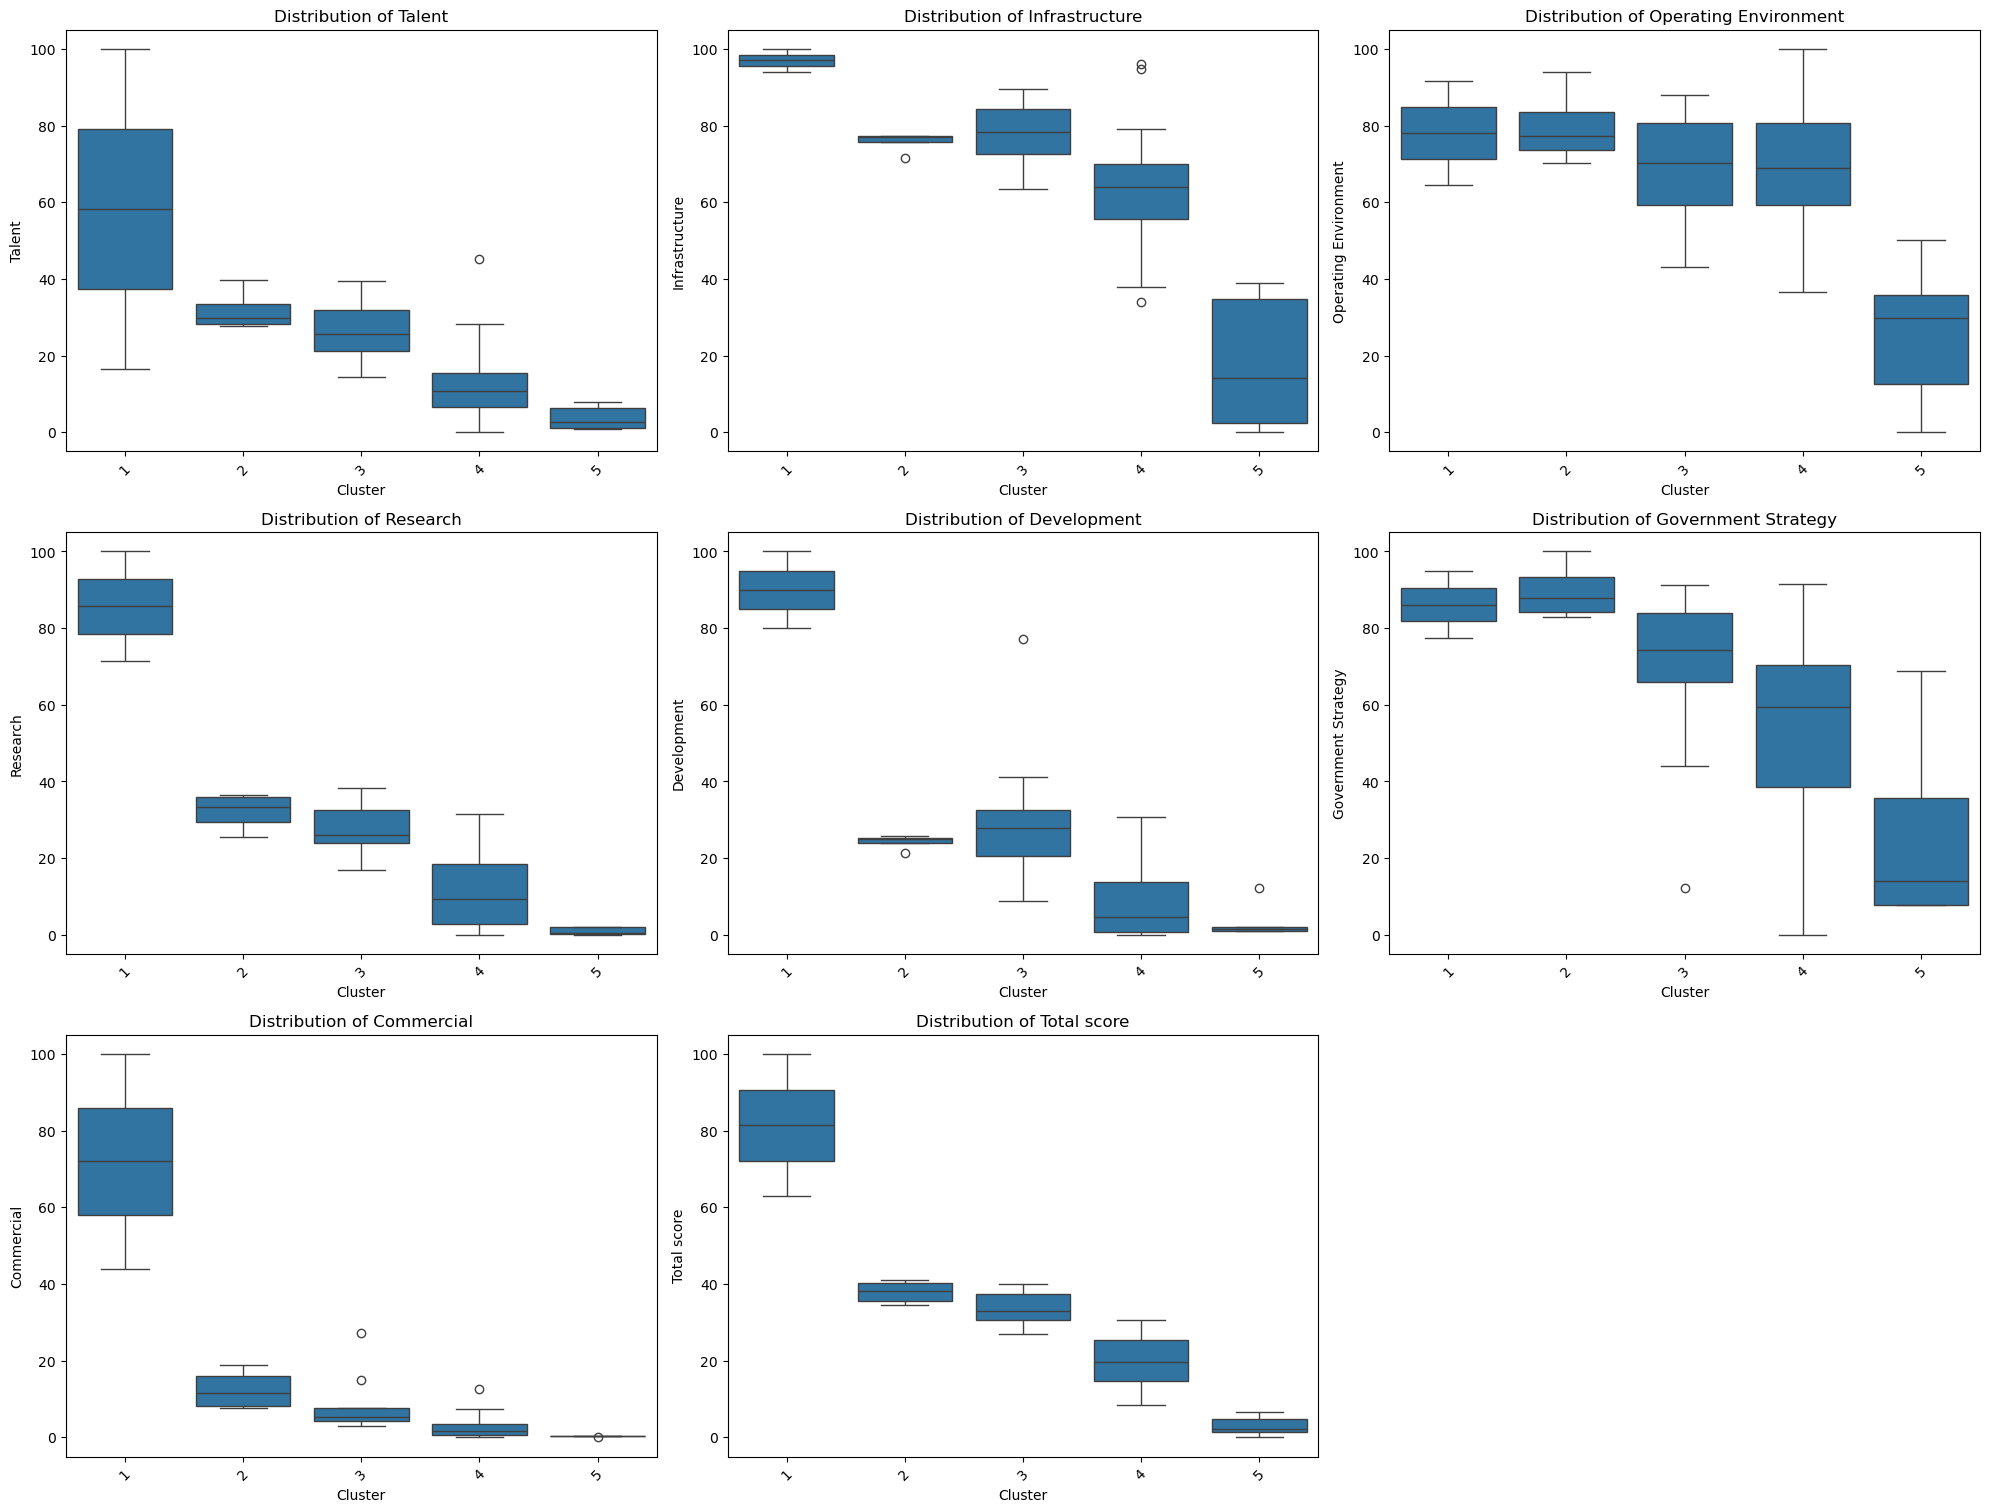

In [255]:
# Boxplot of Clusters by all other features
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

columns = ['Talent', 'Infrastructure', 'Operating Environment',
           'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']

for i in columns:
    ax = plt.subplot(12, 3, plotnumber)  
    sns.boxplot(data=df, x='Cluster', y=i, ax=ax)  
    plt.xticks(rotation=45)
    plt.ylabel(i) 
    plt.title(f'Distribution of {i}')  
    plotnumber += 1

plt.tight_layout() 
plt.show()

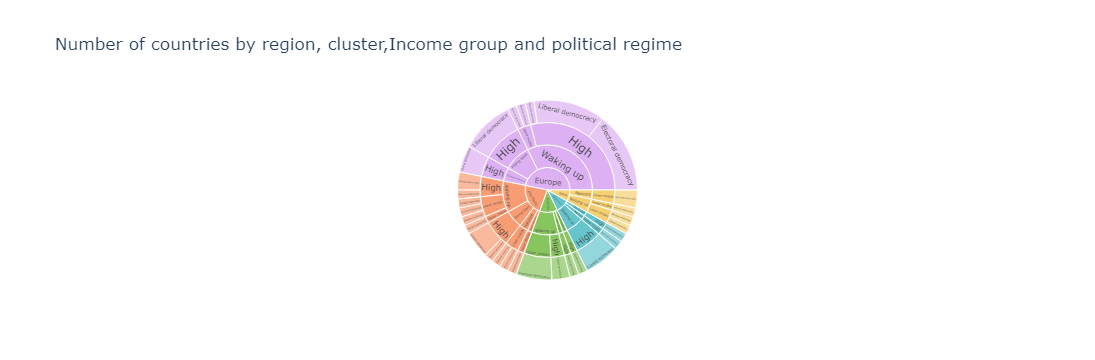

In [256]:
# Aggregate data for the sunburst chart
agg_data = original.groupby(["Region", "Cluster","Income group", "Political regime"]).size().reset_index(name="Count")

# Define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Cluster","Income group", "Political regime"],
    title="Number of countries by region, cluster,Income group and political regime",
    color="Region",
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Display the figure
fig.show()

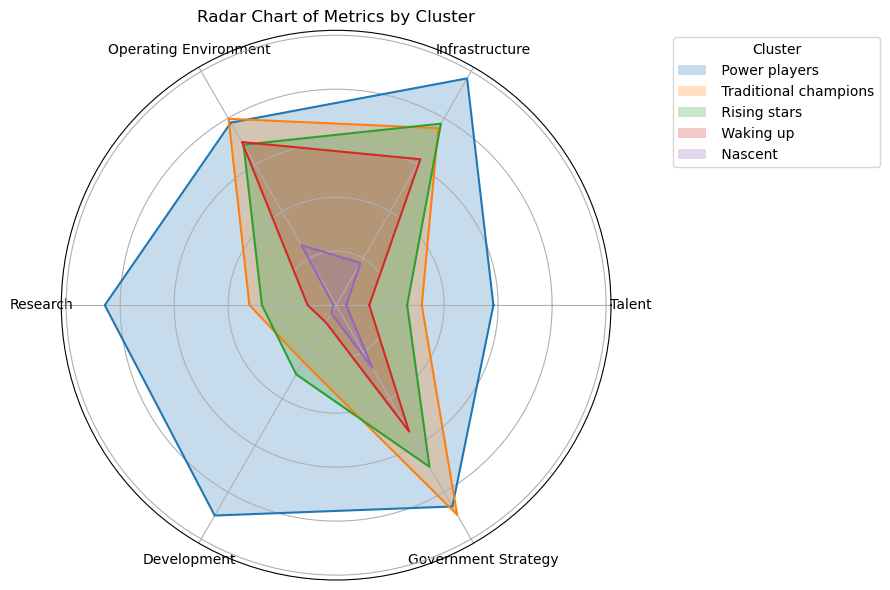

In [257]:
# Radar Chart of Metrics by Cluster
metrics = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy']
num_vars = len(metrics)

# Create a radar chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Loop through each cluster
for cluster_label in df['Cluster'].unique():
    values = df[df['Cluster'] == cluster_label][metrics].mean().values.flatten().tolist()
    values += values[:1] 
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  

    ax.fill(angles, values, alpha=0.25, label=cluster_label)
    ax.plot(angles, values)

ax.set_yticklabels([])
plt.title('Radar Chart of Metrics by Cluster')
plt.xticks(angles[:-1], metrics)

# Create a custom legend using the original DataFrame
unique_clusters = original['Cluster'].unique()
handles, labels = ax.get_legend_handles_labels()
custom_labels = [f' {cluster}' for cluster in unique_clusters]

# Update legend
ax.legend(handles, custom_labels, title='Cluster', bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

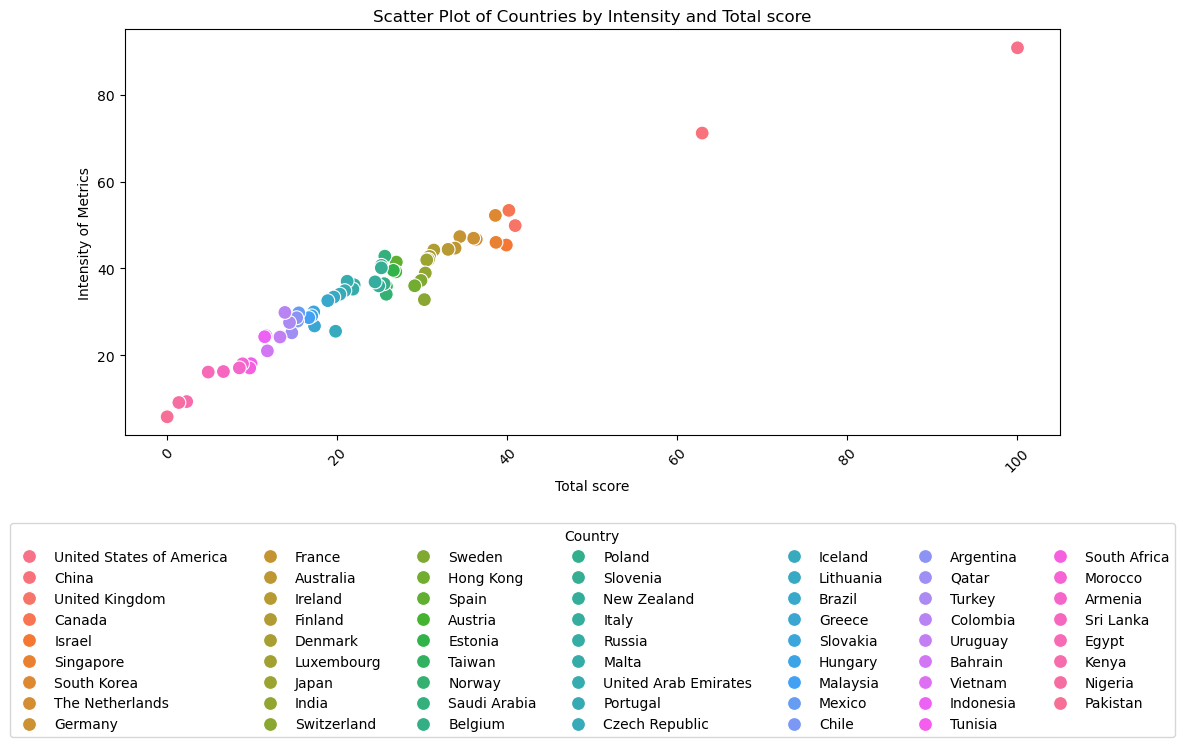

In [258]:
# Scatter Plot of Countries by Intensity and Total score
# Calculate the average intensity
features = ['Talent', 'Infrastructure', 'Operating Environment',
            'Research', 'Development', 'Government Strategy', 'Commercial']
df['Intensity'] = df[features].mean(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Total score', y='Intensity', hue='Country', s=100)

plt.title('Scatter Plot of Countries by Intensity and Total score')
plt.xlabel('Total score')
plt.ylabel('Intensity of Metrics')
plt.xticks(rotation=45)

# Adjusting legend to have 7 columns
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=7)

plt.tight_layout()
plt.show()

In [259]:
# Dropping intensity column
df = df.drop(columns=['Intensity'])

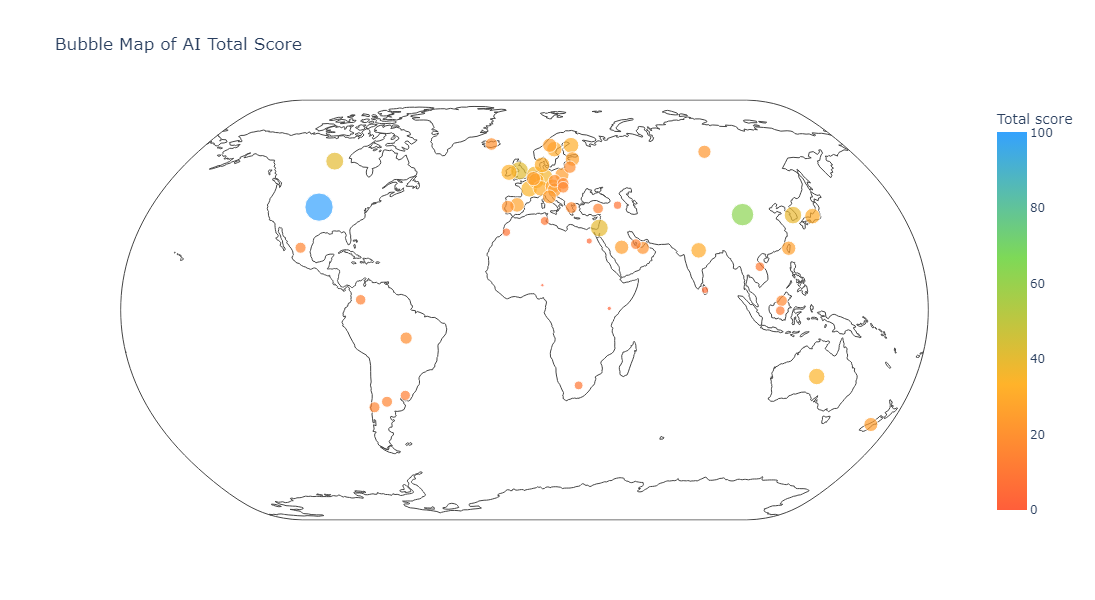

In [260]:
# Bubble Map of AI Total Score

fig = px.scatter_geo(
    df,
    locations="Country",
    locationmode='country names',
    color="Total score",
    range_color=[0, 100],  # Color range
    hover_name="Country",
    title='Bubble Map of AI Total Score',
    projection="natural earth",
    size='Total score',
    color_continuous_scale= ["#FF5E3A", "#FFB32A", "#7ED957", "#34A2FE"]# Change colors here yellow/orange/red and blue.
)

# Update layout for size
fig.update_layout(
    showlegend=True,
    width=1000,  # Increased width
    height=600,  # Increased height
    template="plotly_white"
)

fig.show()

In [261]:
original['Region'].value_counts()

Region
Europe          29
Asia-Pacific    14
Americas         8
Middle East      6
Africa           5
Name: count, dtype: int64

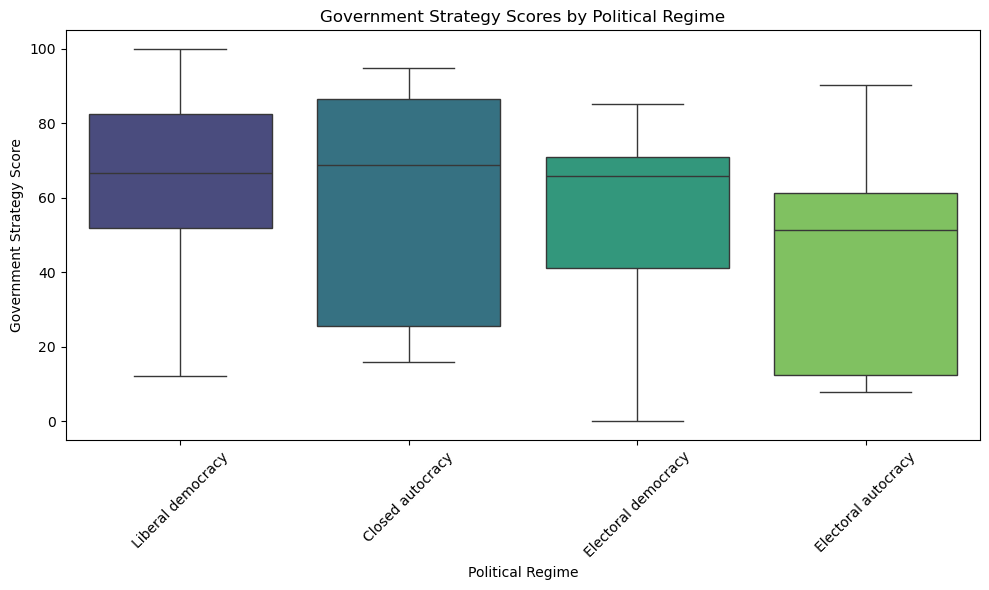

In [262]:
# Boxplot of Government Strategy Scores by Political Regime
plt.figure(figsize=(10, 6))
sns.boxplot(data=original, x='Political regime', y='Government Strategy', palette='viridis')

# Adding title and labels
plt.title('Government Strategy Scores by Political Regime')
plt.xlabel('Political Regime')
plt.ylabel('Government Strategy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Political regime:
1) Liberal Democracy: A political system with free and fair elections, individual rights, and the rule of law.
2) Electoral Democracy: A system where elections occur but may lack fairness and political freedoms.
3) Electoral Autocracy: A regime that holds elections but manipulates the process to maintain power without genuine competition.
4) Closed Autocracy: A system where absolute power is held by a single ruler or small group, with no meaningful elections or dissent tolerated.

In [263]:
df['Political regime'].value_counts()

Political regime
Liberal democracy      27
Electoral democracy    20
Electoral autocracy     8
Closed autocracy        7
Name: count, dtype: int64

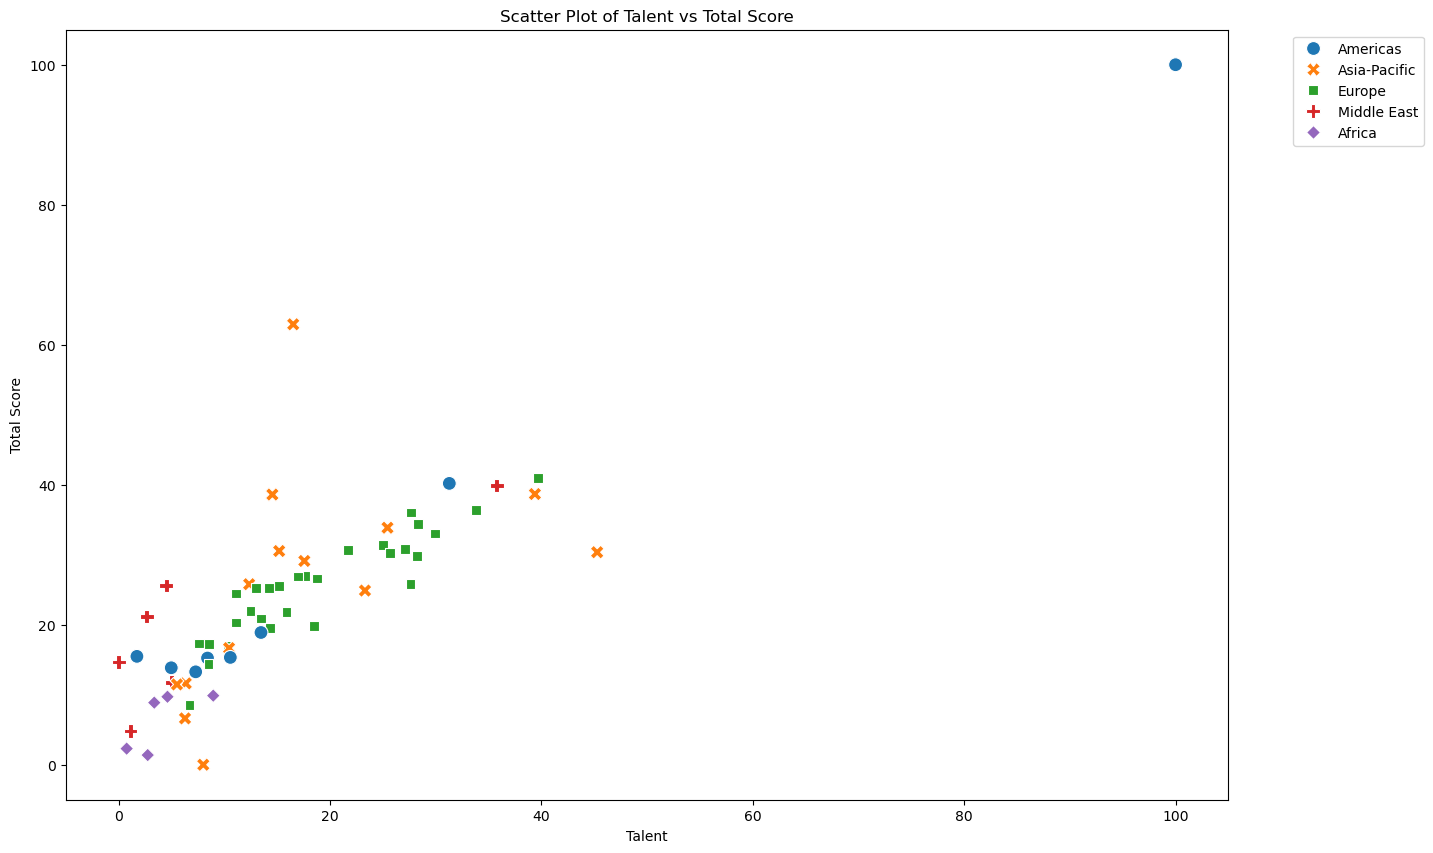

In [264]:
# Scatterplot of Talent to Total score
plt.figure(figsize=(15, 10))
sns.scatterplot(data=original, x='Talent', y='Total score', hue='Region', style='Region', s=100)
plt.title('Scatter Plot of Talent vs Total Score')
plt.xlabel('Talent')
plt.ylabel('Total Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

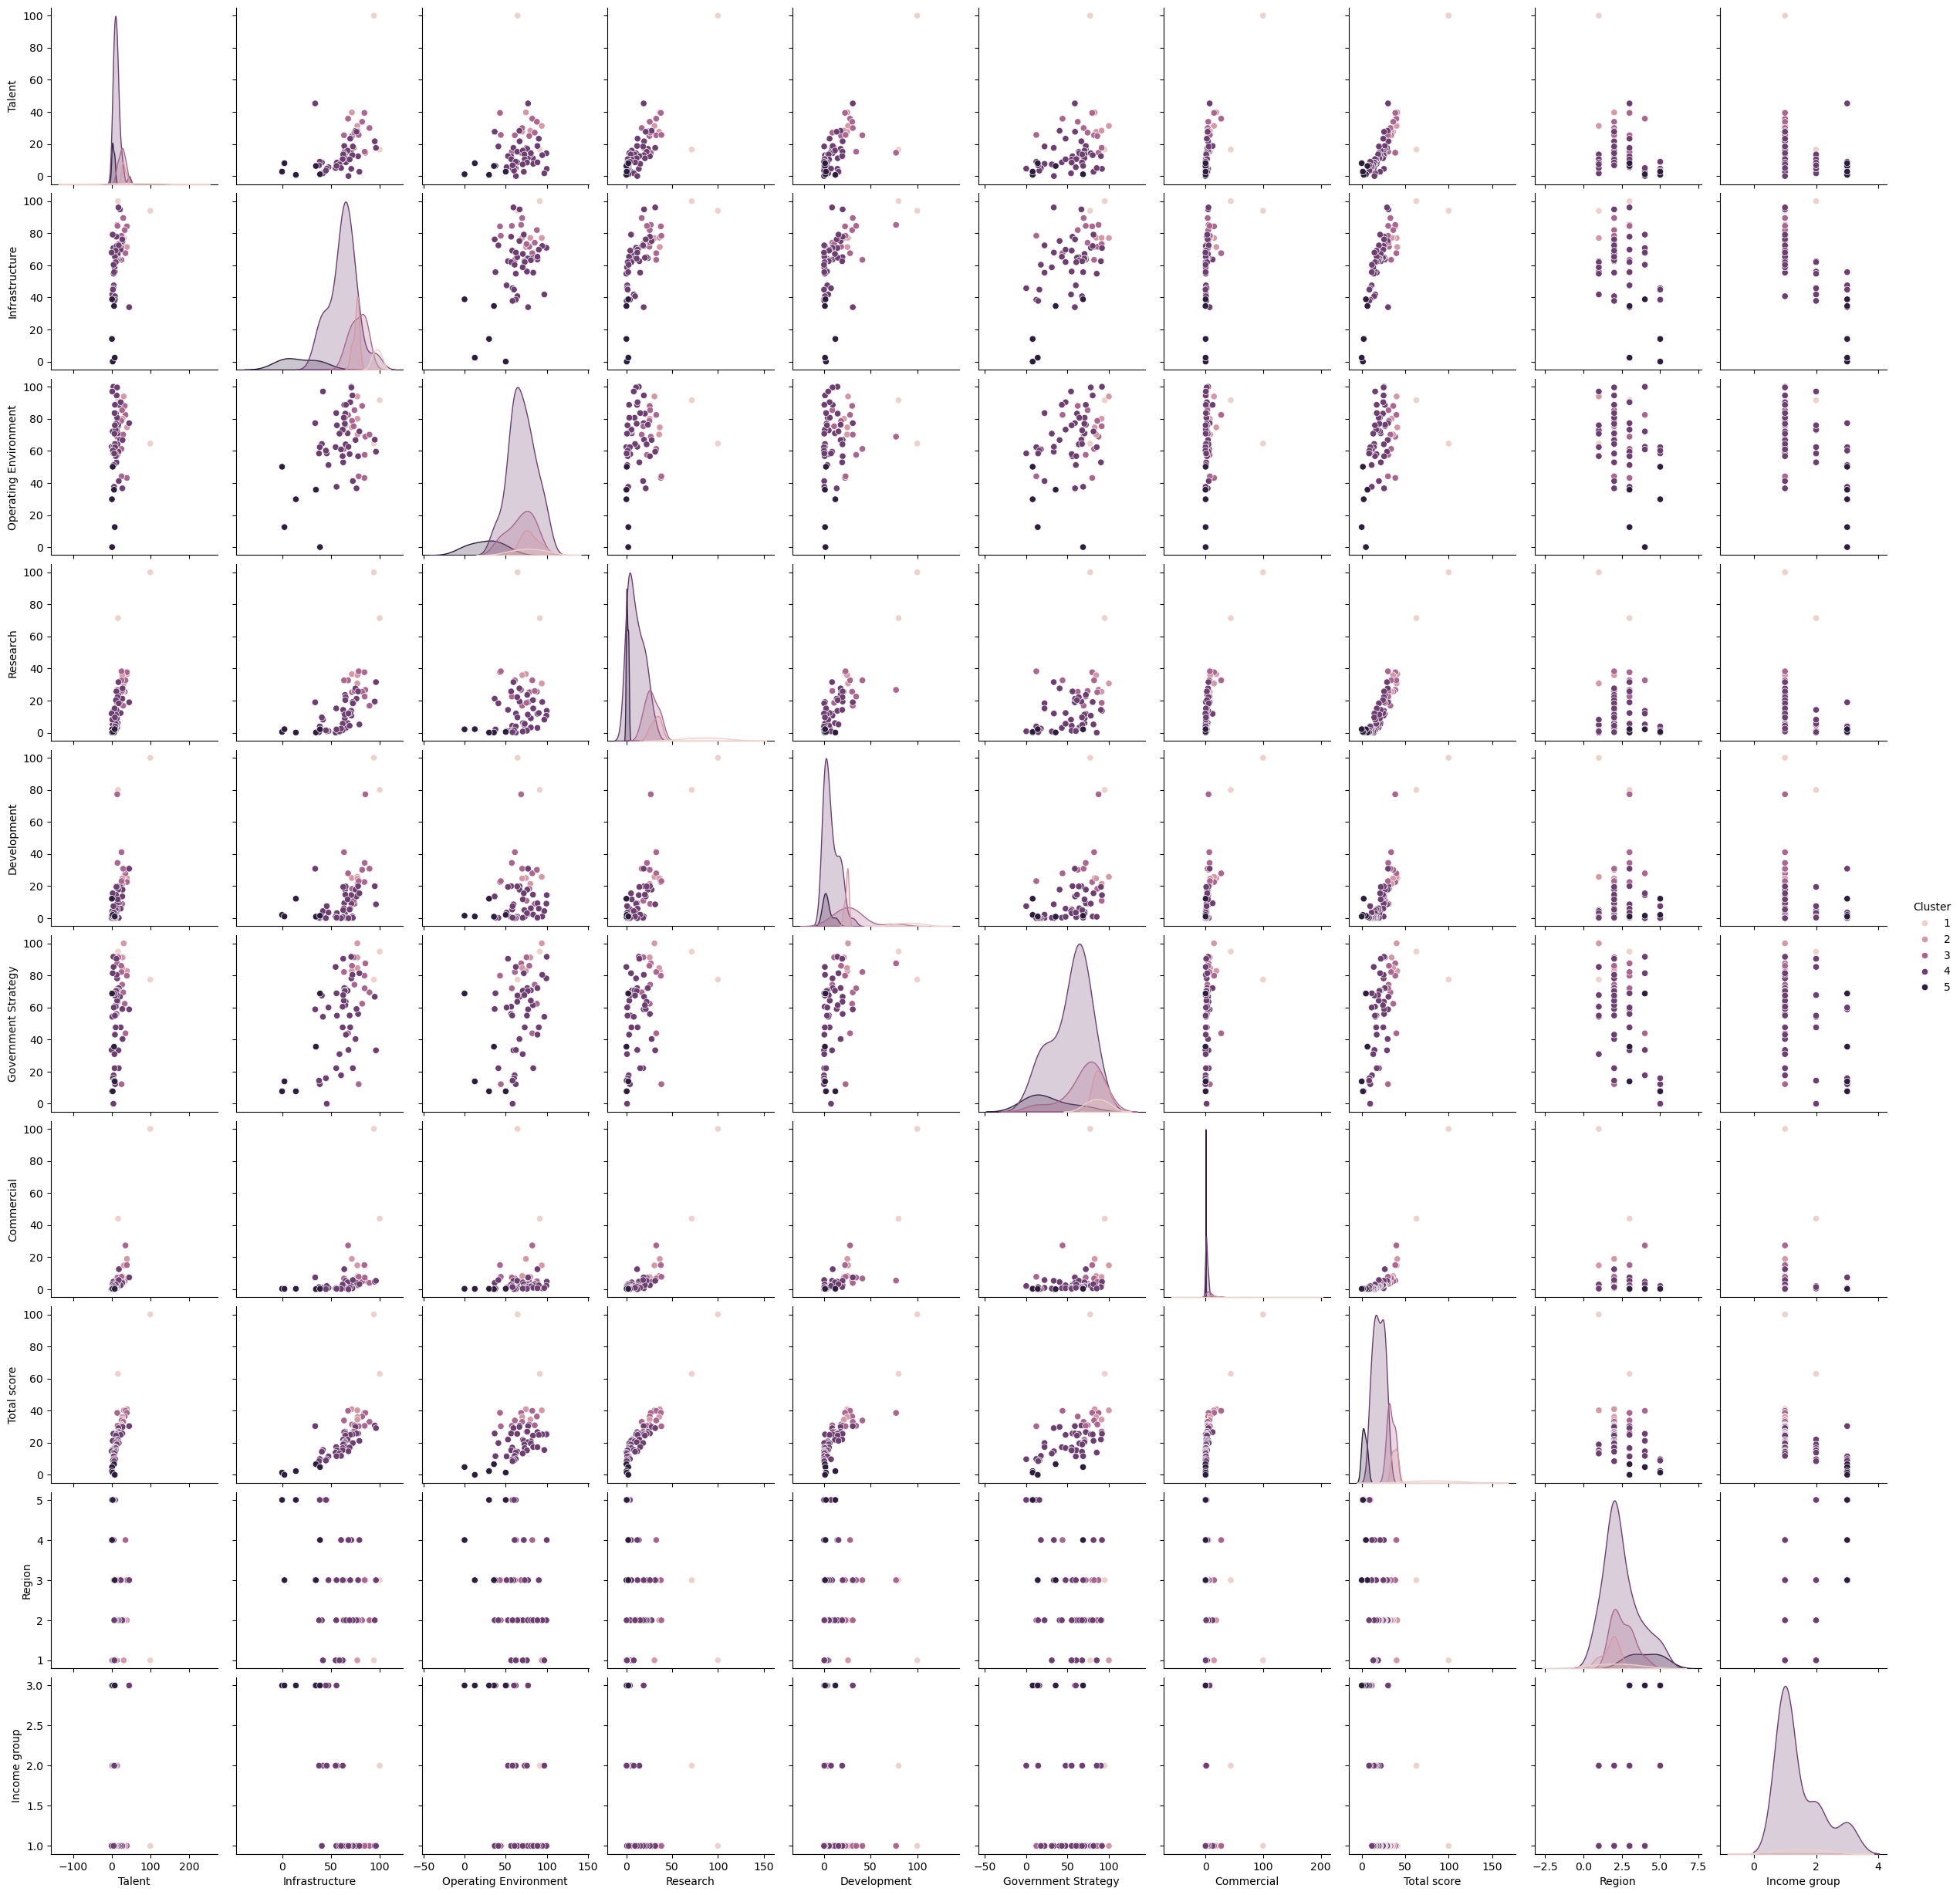

In [265]:
# Pairplot
sns.pairplot(df, hue = 'Cluster');

## 4.3 Correlation matrix

In [266]:
# Group by 'Region' and calculate the mean for specified columns
grouped_df = df.groupby('Cluster')[['Talent', 'Infrastructure', 'Operating Environment',
           'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].mean()

# Highlight the maximum values in each column
highlighted = grouped_df.style.highlight_max(axis=0, color='lightcoral')

# Display the styled DataFrame
highlighted

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
Cluster,,,,,,,,
1,58.255000,97.010000,78.065000,85.710000,89.985000,86.130000,72.010000,81.460000
2,31.720000,75.712500,79.707500,32.122500,24.260000,89.667500,12.432500,37.895000
3,26.304545,77.640000,68.641818,27.499091,29.601818,69.160909,8.153636,33.670000
4,12.254500,62.407500,69.778750,10.563250,7.467750,54.056500,2.447750,19.567750
5,3.774000,18.004000,25.642000,0.978000,3.558000,26.742000,0.262000,3.026000


In [267]:
# Calculate the correlation matrix for numeric columns 
correlation_matrix = df.select_dtypes(include=['int64','float64']).corr().round(2)

# Define a function to highlight max values excluding 1
def highlight_max_excluding_one(s):
    is_max = s == s[s != 1].max()  
    return ['background-color: lightcoral' if v else '' for v in is_max]

# Apply the highlighting function
highlighted = correlation_matrix.style.apply(highlight_max_excluding_one)

# Display the styled DataFrame
highlighted

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group
Talent,1.000000,0.460000,0.160000,0.810000,0.680000,0.320000,0.800000,0.860000,-0.320000,-0.690000,-0.330000
Infrastructure,0.460000,1.000000,0.410000,0.620000,0.510000,0.550000,0.380000,0.720000,-0.370000,-0.650000,-0.740000
Operating Environment,0.160000,0.410000,1.000000,0.200000,0.160000,0.400000,0.110000,0.370000,-0.330000,-0.380000,-0.500000
Research,0.810000,0.620000,0.200000,1.000000,0.850000,0.380000,0.850000,0.950000,-0.210000,-0.820000,-0.380000
Development,0.680000,0.510000,0.160000,0.850000,1.000000,0.420000,0.780000,0.870000,-0.090000,-0.740000,-0.220000
Government Strategy,0.320000,0.550000,0.400000,0.380000,0.420000,1.000000,0.250000,0.530000,-0.450000,-0.520000,-0.380000
Commercial,0.800000,0.380000,0.110000,0.850000,0.780000,0.250000,1.000000,0.860000,-0.160000,-0.690000,-0.160000
Total score,0.860000,0.720000,0.370000,0.950000,0.870000,0.530000,0.860000,1.000000,-0.320000,-0.860000,-0.480000
Region,-0.320000,-0.370000,-0.330000,-0.210000,-0.090000,-0.450000,-0.160000,-0.320000,1.000000,0.290000,0.460000
Cluster,-0.690000,-0.650000,-0.380000,-0.820000,-0.740000,-0.520000,-0.690000,-0.860000,0.290000,1.000000,0.420000


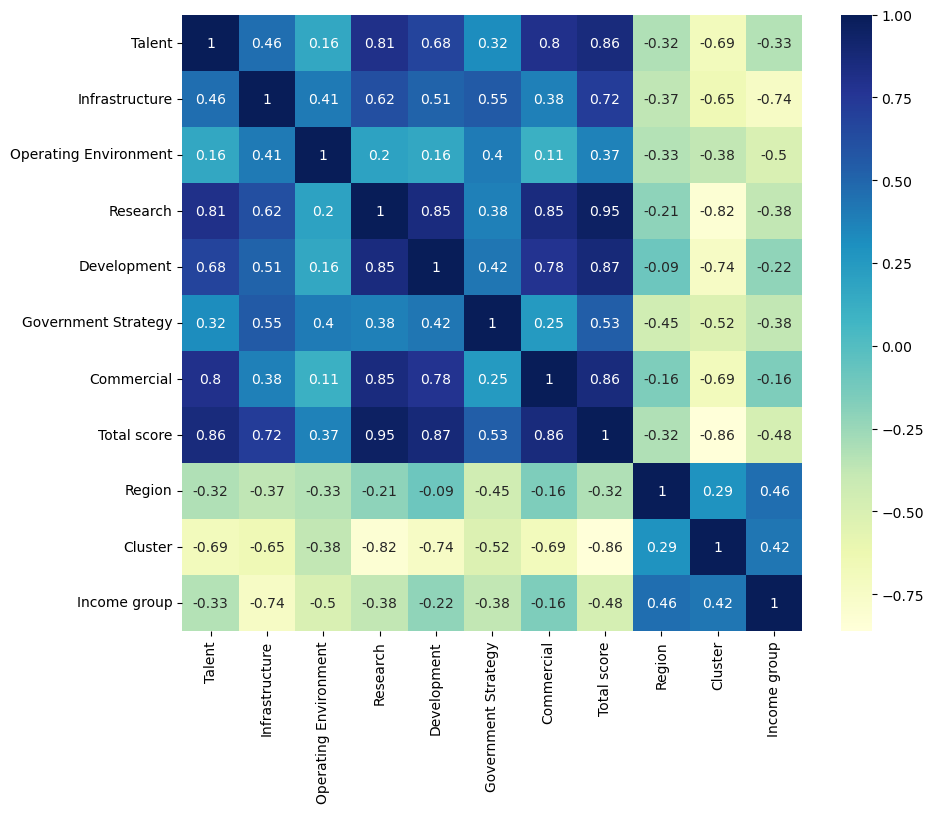

In [268]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int32','int64','float64']).corr().round(2), annot=True, cmap='YlGnBu')
plt.show()

## Key Observations

High Correlations:
1) Research and Total Score (0.946): Indicates that higher research capabilities strongly correlate with higher overall scores.
2) Research and Talent (0.810): Suggests that areas with more talent tend to have better research outputs.
3) Development and Total Score (0.866): Highlights that development efforts are closely linked to overall success.

Moderate Correlations:
1) Talent and Commercial (0.795): Suggests a relationship where talent availability impacts commercial success.
2) Infrastructure and Research (0.617): Indicates that better infrastructure may support more effective research.

Lower Correlations:
1) Operating Environment shows relatively low correlations with other factors, suggesting it may have a lesser impact on AI implementation and outcomes compared to other indicators.

## Clustering

### Multivariate Clustering 

In [353]:
# Select columns for K-Means
kmeans_columns = df[['Talent','Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial','Income group']]

In [270]:
# Standardscaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
kmeans_data = scaler.fit_transform(kmeans_columns)

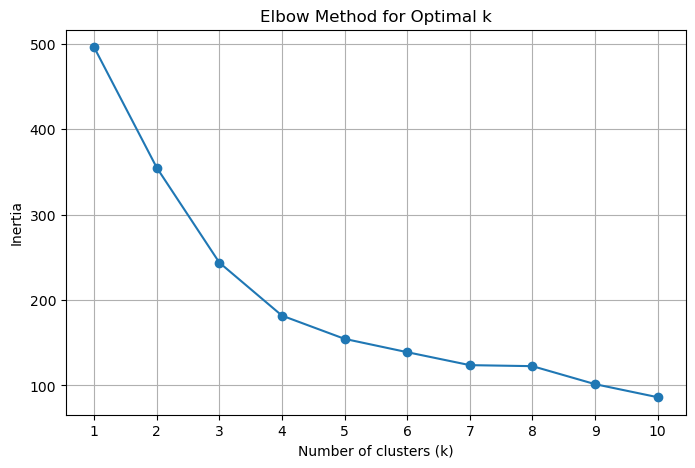

In [271]:
# Elbow Method for Optimal k
from sklearn.cluster import KMeans

# Initialize an empty list to hold inertia values
inertia = []
k_values = range(1, 11)

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Show all k values on x-axis
plt.grid(True)
plt.show()


In [272]:
# Fit K-Means with the chosen number of clusters
optimal_k = 3  # Replaced with k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(kmeans_data)

# Display the cluster assignments
print(df[['Country', 'Cluster']])  

                     Country  Cluster
0   United States of America        2
1                      China        0
2             United Kingdom        0
3                     Canada        0
4                     Israel        0
..                       ...      ...
57                 Sri Lanka        1
58                     Egypt        1
59                     Kenya        1
60                   Nigeria        1
61                  Pakistan        1

[62 rows x 2 columns]


In [273]:
# Select only numeric columns for clustering analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Group by cluster and calculate mean values for each numeric feature
cluster_analysis = df.groupby('Cluster')[numeric_cols].mean()

# Display the analysis
cluster_analysis

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group
Cluster,,,,,,,,,,
0,20.769429,74.835714,73.800000,23.138857,20.976571,70.976857,7.214286,30.178571,2.371429,1.057143
1,8.263846,47.075385,57.762308,4.613846,3.267308,39.465000,1.160000,12.556154,2.807692,2.038462
2,100.000000,94.020000,64.560000,100.000000,100.000000,77.390000,100.000000,100.000000,1.000000,1.000000


In [274]:
df['Cluster'].value_counts()

Cluster
0    35
1    26
2     1
Name: count, dtype: int64

### Univariate Clustering 

In [275]:
clustering1 = KMeans(n_clusters = 2)

In [276]:
clustering1.fit(df[['Total score']])

KMeans(n_clusters=2)

In [277]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [278]:
df['Total_score_clusters'] = clustering1.labels_
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Total_score_clusters
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,2,1,Liberal democracy,0
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3,0,2,Closed autocracy,0
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2,0,1,Liberal democracy,0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,0,1,Liberal democracy,0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,0,1,Liberal democracy,0


In [279]:
df['Total_score_clusters'].value_counts()

Total_score_clusters
0    31
1    31
Name: count, dtype: int64

In [280]:
clustering1.inertia_

7368.1263935483885

In [281]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Total_score_clusters']])
    inertia_scores.append(kmeans.inertia_)

In [282]:
inertia_scores

[15.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

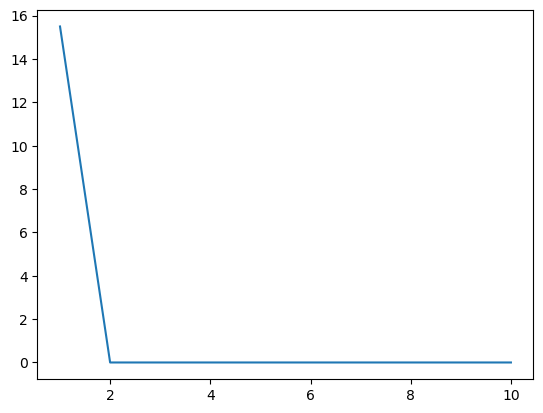

In [283]:
plt.plot(range(1,11),inertia_scores)

In [284]:
df.groupby('Total_score_clusters')[['Talent', 'Infrastructure', 'Operating Environment',
           'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].mean().round(2)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
Total_score_clusters,,,,,,,,
0,25.88,75.70,73.89,28.39,25.98,70.09,11.14,34.22
1,7.72,51.31,59.96,4.83,3.67,45.64,1.20,13.61


In [285]:
clustering9 = KMeans(n_clusters = 2)
clustering9.fit(df[['Research']])
clustering9.labels_
df['Research_cluster'] = clustering9.labels_
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Total_score_clusters,Research_cluster
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,2,1,Liberal democracy,0,1
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3,0,2,Closed autocracy,0,1
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2,0,1,Liberal democracy,0,0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,0,1,Liberal democracy,0,0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,0,1,Liberal democracy,0,0


In [286]:
df['Research_cluster'].value_counts()

Research_cluster
0    60
1     2
Name: count, dtype: int64

### Bivariate Clustering 

### Implementation
- **Talent** focuses on the availability of skilled practitioners in artificial intelligence solutions.
- **Infrastructure** assesses the scale of advanced computing infrastructure and semiconductor manufacturing.
- **Operating Environment** focuses on the regulatory context of and public opinion on artificial intelligence.

### Innovation 
- **Research** looks at the quantity and quality of specialist academic and industry research.
- **Development** focuses on the development of new AI models and the application of AI technology in patents across other fields.

### Investment
- **Government Strategy** gauges the depth of commitment from national governments to artificial intelligence; investigating spending and national strategies.
- **Commercial** Ecosystem focuses on the level of startup activity, private investment and business initiatives related to artificial intelligence.

## Investment

In [287]:
clustering2 = KMeans(n_clusters=4)
clustering2.fit(df[['Government Strategy','Commercial']])  	

KMeans(n_clusters=4)

In [288]:
clustering2.labels_

array([2, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1, 1, 3, 0,
       0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [289]:
df['Investment_clusters'] = clustering2.labels_
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Total_score_clusters,Research_cluster,Investment_clusters
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,2,1,Liberal democracy,0,1,2
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3,0,2,Closed autocracy,0,1,3
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2,0,1,Liberal democracy,0,0,3
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,0,1,Liberal democracy,0,0,3
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,0,1,Liberal democracy,0,0,0


In [290]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Government Strategy','Commercial']])
    inertia_scores2.append(kmeans2.inertia_)

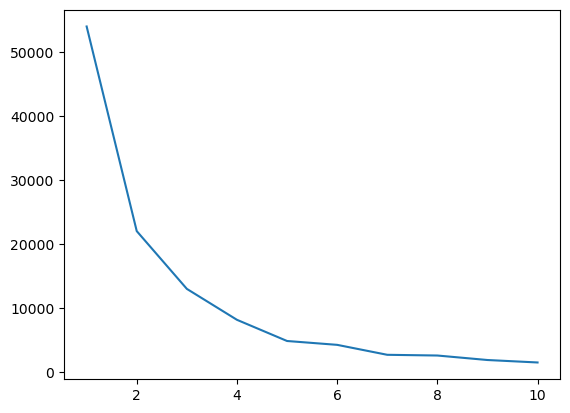

In [291]:
plt.plot(range(1,11),inertia_scores2)

In [292]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

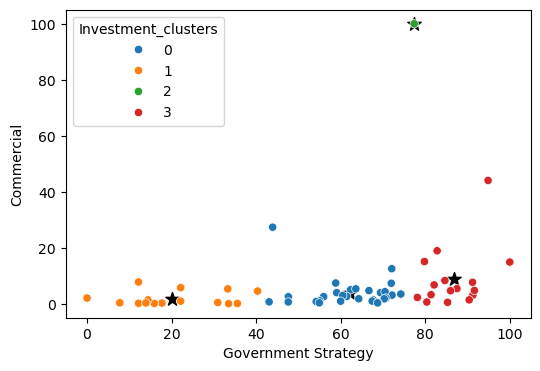

In [293]:
plt.figure(figsize =(6,4))
plt.scatter(x = centers['x'],y = centers['y'], s =100, c='black', marker ='*')
sns.scatterplot(data = df, x = 'Government Strategy',y='Commercial',hue='Investment_clusters', palette = 'tab10');

In [294]:
df.groupby('Investment_clusters')[['Talent', 'Infrastructure', 'Operating Environment',
           'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].mean().round(2)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
Investment_clusters,,,,,,,,
0,16.33,64.45,69.26,12.80,11.56,62.18,3.85,22.50
1,9.44,48.94,53.56,9.70,4.77,19.98,1.85,13.33
2,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00
3,19.82,74.44,76.20,25.21,25.47,86.72,8.84,32.31


## Innovation

In [295]:
clustering3 = KMeans(n_clusters = 3)
clustering3.fit(df[['Research','Development']])  	

KMeans(n_clusters=3)

In [296]:
clustering3.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [297]:
df['Innovation_clusters'] = clustering3.labels_
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Total_score_clusters,Research_cluster,Investment_clusters,Innovation_clusters
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,2,1,Liberal democracy,0,1,2,1
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3,0,2,Closed autocracy,0,1,3,1
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2,0,1,Liberal democracy,0,0,3,0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,0,1,Liberal democracy,0,0,3,0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,0,1,Liberal democracy,0,0,0,0


In [298]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(df[['Research','Development']])
    inertia_scores3.append(kmeans3.inertia_)

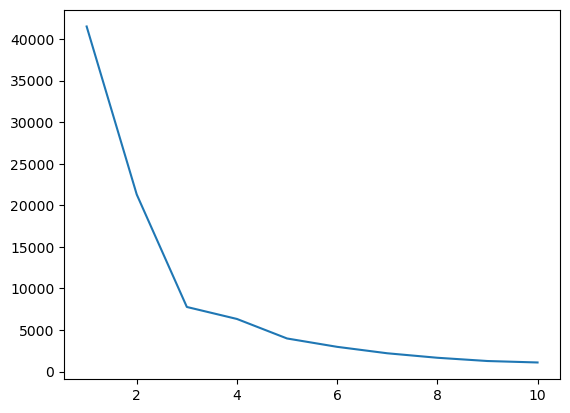

In [299]:
plt.plot(range(1,11),inertia_scores3)

In [300]:
centers = pd.DataFrame(clustering3.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Research', ylabel='Development'>

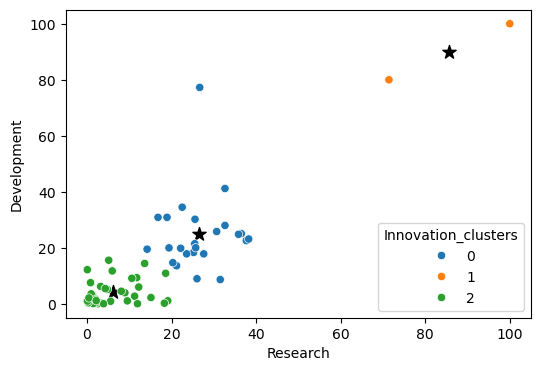

In [301]:
plt.figure(figsize =(6,4))
plt.scatter(x = centers['x'],y = centers['y'], s =100, c='black', marker ='*')
sns.scatterplot(data = df, x = 'Research',y='Development',hue='Innovation_clusters', palette = 'tab10')

In [302]:
df.groupby('Innovation_clusters')[['Talent', 'Infrastructure', 'Operating Environment',
           'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].mean().round(2)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
Innovation_clusters,,,,,,,,
0,25.29,74.78,68.29,26.54,24.76,67.91,7.38,31.89
1,58.26,97.01,78.06,85.71,89.98,86.13,72.01,81.46
2,8.84,54.13,65.40,6.15,4.02,49.60,1.71,15.40


# Implementation

In [303]:
clustering4 = KMeans(n_clusters = 4)
clustering4.fit(df[['Operating Environment','Infrastructure']])  	

KMeans(n_clusters=4)

In [304]:
clustering4.labels_

array([2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

In [305]:
df['Implementation_clusters'] = clustering4.labels_
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Total_score_clusters,Research_cluster,Investment_clusters,Innovation_clusters,Implementation_clusters
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,2,1,Liberal democracy,0,1,2,1,2
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3,0,2,Closed autocracy,0,1,3,1,0
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2,0,1,Liberal democracy,0,0,3,0,0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,0,1,Liberal democracy,0,0,3,0,0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,0,1,Liberal democracy,0,0,0,0,0


In [306]:
inertia_scores4 = []
for i in range(1,11):
    kmeans4 = KMeans(n_clusters = i)
    kmeans4.fit(df[['Operating Environment','Infrastructure']])
    inertia_scores4.append(kmeans4.inertia_)

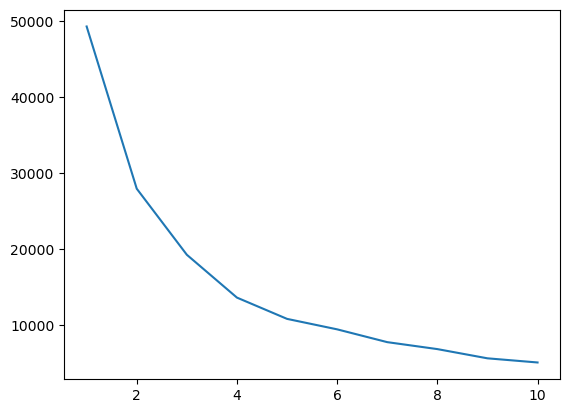

In [307]:
plt.plot(range(1,11),inertia_scores4)

In [308]:
centers = pd.DataFrame(clustering4.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Operating Environment', ylabel='Infrastructure'>

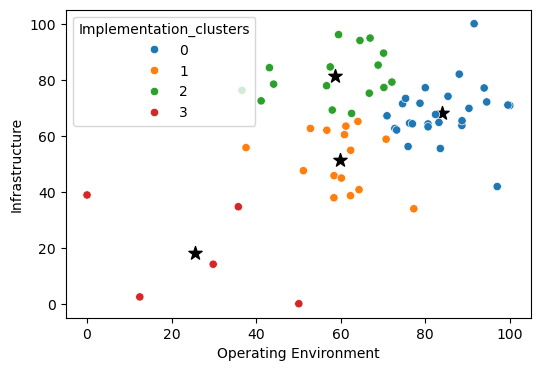

In [309]:
plt.figure(figsize =(6,4))
plt.scatter(x = centers['x'],y = centers['y'], s =100, c='black', marker ='*')
sns.scatterplot(data = df, x = 'Operating Environment',y='Infrastructure',hue='Implementation_clusters', palette = 'tab10')

In [310]:
df.groupby('Investment_clusters')[['Talent', 'Infrastructure', 'Operating Environment',
           'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].mean().round(2)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
Investment_clusters,,,,,,,,
0,16.33,64.45,69.26,12.80,11.56,62.18,3.85,22.50
1,9.44,48.94,53.56,9.70,4.77,19.98,1.85,13.33
2,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00
3,19.82,74.44,76.20,25.21,25.47,86.72,8.84,32.31


In [311]:
df['Cluster'].value_counts()

Cluster
0    35
1    26
2     1
Name: count, dtype: int64

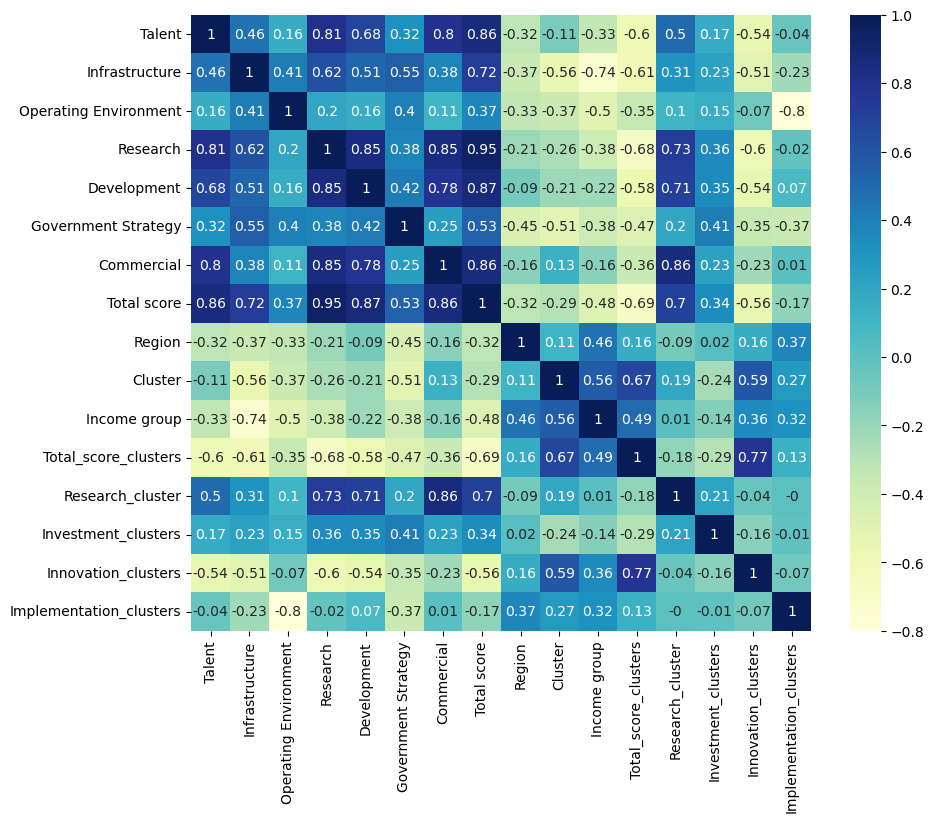

In [312]:
# Correlation heatmap after kmeans
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int32','int64','float64']).corr().round(2), annot=True, cmap='YlGnBu')
plt.show()

In [313]:
corr_matrix = df.select_dtypes(include=['int32','int64','float64']).corr()
high_corr_columns = corr_matrix.index[abs(corr_matrix['Cluster']) > 0.4].tolist()

# Remove 'Total score' from the list
high_corr_columns.remove('Cluster')

# Display the result
print("Columns with correlation >0.40 to 'Cluster':\n", high_corr_columns)

Columns with correlation >0.40 to 'Cluster':
 ['Infrastructure', 'Government Strategy', 'Income group', 'Total_score_clusters', 'Innovation_clusters']


# SUPERVISED

In [314]:
# Import necessary libraries
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , roc_curve, auc

In [315]:
# Remove rows where Cluster is 2
df_filtered = df[df['Cluster'] != 2]

# Prepare features (X) and target (y)
X = df_filtered.drop(columns=['Cluster','Country','Political regime'])  # Features
y = df_filtered['Cluster']  # Target variable

In [316]:
# Check shape of X and y
print(f'X shape is {X.shape}')
print(f'y shape is {y.shape}')

X shape is (61, 15)
y shape is (61,)


In [317]:
y

1     0
2     0
3     0
4     0
5     0
     ..
57    1
58    1
59    1
60    1
61    1
Name: Cluster, Length: 61, dtype: int32

In [318]:
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import label_binarize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [319]:
# Check shape of train and test sets
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (48, 15)
X_test shape is (13, 15)
y_train shape is (48,)
y_test shape is (13,)


In [320]:
# Confusion Matrix
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


XGBoost:
Accuracy: 0.8461538461538461
Precision: 0.8571428571428572
Recall: 0.875
F1 Score: 0.8452380952380952
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.71      1.00      0.83         5

    accuracy                           0.85        13
   macro avg       0.86      0.88      0.85        13
weighted avg       0.89      0.85      0.85        13



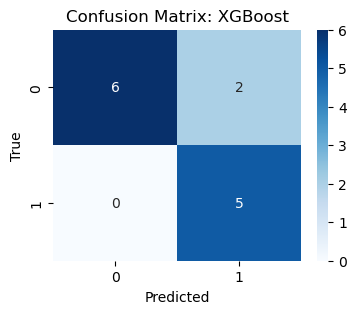

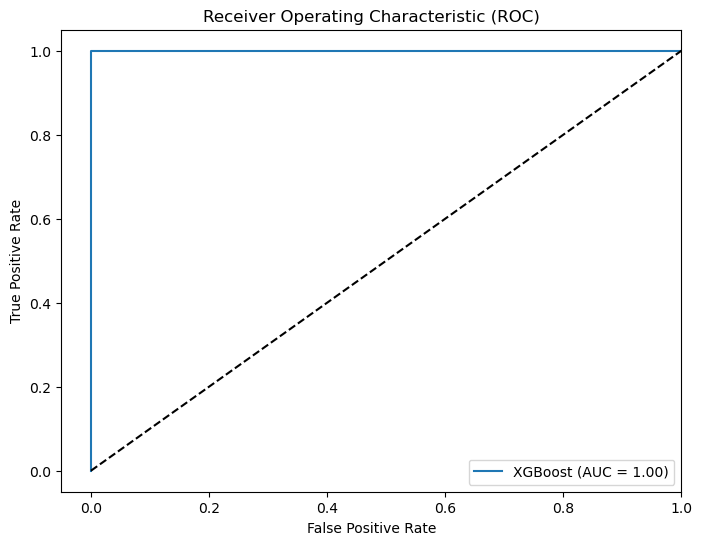

In [325]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics
print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='macro')}")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=[8, 6])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [382]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning for XG Boost Classifier Using GridSearchCV
grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, 
                        scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

# Predict and evaluate the best model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best score for XGBoost: 0.9377777777777776
Accuracy: 0.8461538461538461


XGBoost Classifier Using GridSearchCV:
Accuracy: 0.8462
Precision: 0.8901
Recall: 0.8462
F1 Score: 0.8480

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.71      1.00      0.83         5

    accuracy                           0.85        13
   macro avg       0.86      0.88      0.85        13
weighted avg       0.89      0.85      0.85        13



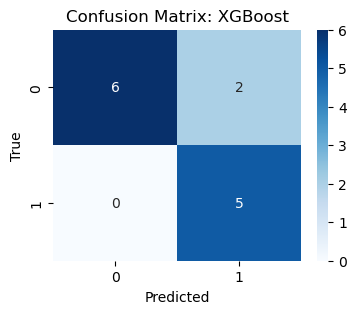

In [383]:
# Initialize XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV with the XGBoostClassifier
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best model from GridSearchCV
best_xgb_clf = grid_search_xgb.best_estimator_

# Predictions using the best model
y_pred_xgb = best_xgb_clf.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print evaluation metrics
print("XGBoost Classifier Using GridSearchCV:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [331]:
# Load the data
path = r"C:\Users\Vinitha\Desktop\MiniProject_3\AI_Index\merged_file.csv"
df24 = pd.read_csv(path)

In [332]:
df24.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States,100,100,100,96,100,100,83,100,Americas,Power players,High,Liberal democracy
1,China,54,26,66,70,54,69,66,48,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,30,32,27,90,23,12,65,25,Europe,Traditional champions,High,Liberal democracy
3,Canada,26,26,27,75,15,14,70,23,Americas,Traditional champions,High,Liberal democracy
4,Israel,26,27,25,47,17,19,35,29,Middle East,Rising stars,High,Liberal democracy


In [333]:
df24.shape

(62, 13)

In [334]:
# Mapping dictionary
bm_map = {
    'Americas': 1,
    'Europe': 2,
    'Asia-Pacific': 3,
    'Middle East': 4,
    'Africa': 5
}
df24['Region'] = df24["Region"].map(bm_map)

In [335]:
# Mapping dictionary
bm_map = {
    'Power players': 1,
    'Traditional champions': 2,
    'Rising stars': 3,
    'Waking up': 4,
    'Nascent': 5
}
df24['Cluster'] = df24["Cluster"].map(bm_map)

In [336]:
# Mapping dictionary
bm_map = {
    'High': 1,
    'Upper middle': 2,
    'Lower middle': 3
}
df24['Income group'] = df24["Income group"].map(bm_map)

In [337]:
df24.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States,100,100,100,96,100,100,83,100,1,1,1,Liberal democracy
1,China,54,26,66,70,54,69,66,48,3,1,2,Closed autocracy
2,United Kingdom,30,32,27,90,23,12,65,25,2,2,1,Liberal democracy
3,Canada,26,26,27,75,15,14,70,23,1,2,1,Liberal democracy
4,Israel,26,27,25,47,17,19,35,29,4,3,1,Liberal democracy


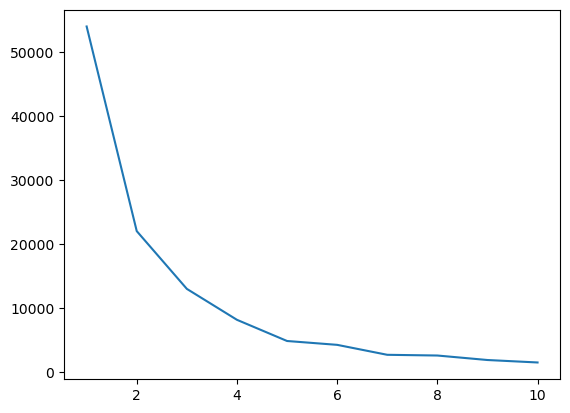

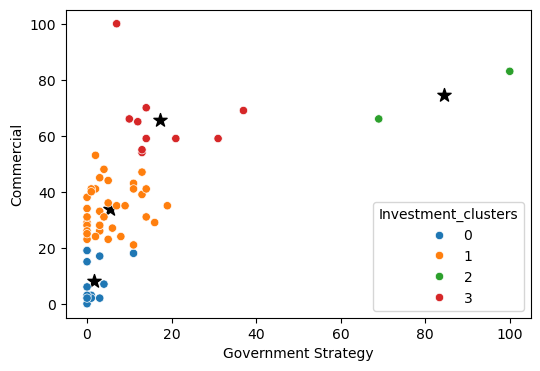

In [338]:
# Investment clusters for 2024
clustering5 = KMeans(n_clusters=4)
clustering5.fit(df24[['Government Strategy','Commercial']])  

clustering5.labels_

df24['Investment_clusters'] = clustering5.labels_
df24.head()

inertia_scores5 = []
for i in range(1,11):
    kmeans5 = KMeans(n_clusters = i)
    kmeans5.fit(df24[['Government Strategy','Commercial']])
    inertia_scores5.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_scores2)

centers = pd.DataFrame(clustering5.cluster_centers_)
centers.columns=['x','y']

plt.figure(figsize =(6,4))
plt.scatter(x = centers['x'],y = centers['y'], s =100, c='black', marker ='*')
sns.scatterplot(data = df24, x = 'Government Strategy',y='Commercial',hue='Investment_clusters', palette = 'tab10');

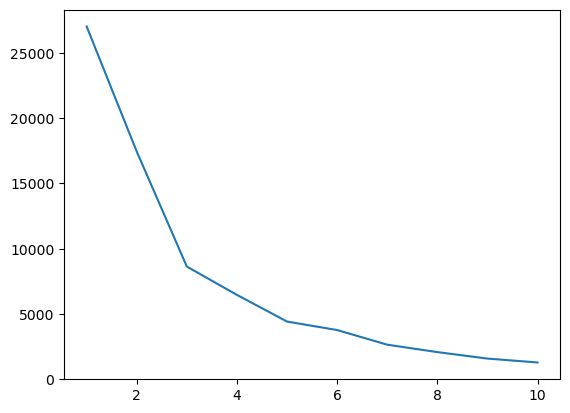

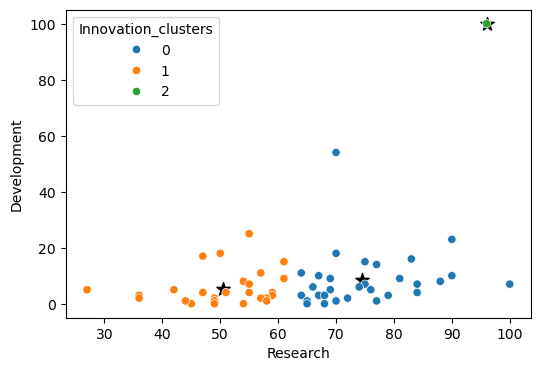

In [339]:
# Innovation clusters for 2024
clustering6 = KMeans(n_clusters=3)
clustering6.fit(df24[['Research','Development']])  

clustering6.labels_

df24['Innovation_clusters'] = clustering6.labels_
df24.head()

inertia_scores6 = []
for i in range(1,11):
    kmeans6 = KMeans(n_clusters = i)
    kmeans6.fit(df24[['Research','Development']])
    inertia_scores6.append(kmeans6.inertia_)

plt.plot(range(1,11),inertia_scores6)

centers = pd.DataFrame(clustering6.cluster_centers_)
centers.columns=['x','y']

plt.figure(figsize =(6,4))
plt.scatter(x = centers['x'],y = centers['y'], s =100, c='black', marker ='*')
sns.scatterplot(data = df24, x = 'Research',y='Development',hue='Innovation_clusters', palette = 'tab10');

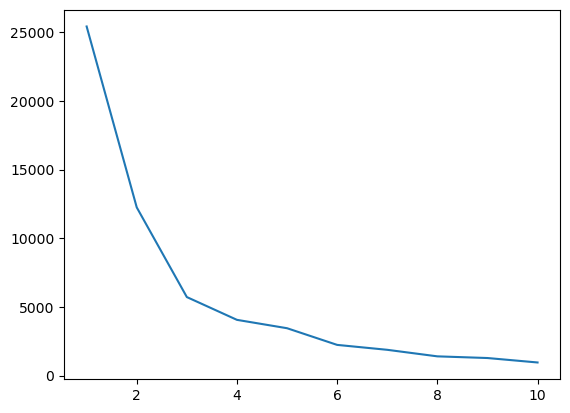

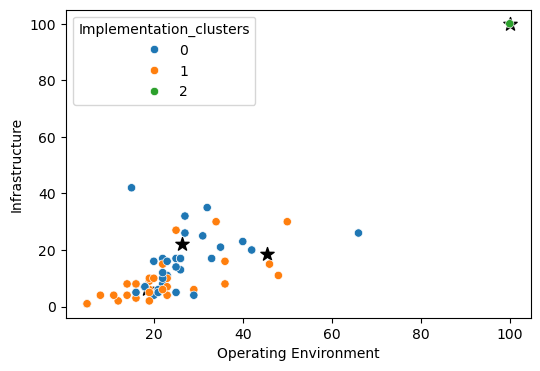

In [340]:
# Implementation clusters for 2024
clustering7 = KMeans(n_clusters=4)
clustering7.fit(df24[['Operating Environment','Infrastructure']])  

clustering7.labels_

df24['Implementation_clusters'] = clustering6.labels_
df24.head()

inertia_scores7 = []
for i in range(1,11):
    kmeans7 = KMeans(n_clusters = i)
    kmeans7.fit(df24[['Operating Environment','Infrastructure']])
    inertia_scores7.append(kmeans7.inertia_)

plt.plot(range(1,11),inertia_scores7)

centers = pd.DataFrame(clustering7.cluster_centers_)
centers.columns=['x','y']

plt.figure(figsize =(6,4))
plt.scatter(x = centers['x'],y = centers['y'], s =100, c='black', marker ='*')
sns.scatterplot(data = df24, x = 'Operating Environment',y='Infrastructure',hue='Implementation_clusters', palette = 'tab10');

In [341]:
clustering8 = KMeans(n_clusters = 2)
clustering8.fit(df24[['Total score']])
clustering8.labels_
df24['Total_score_clusters'] = clustering8.labels_
df24.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Investment_clusters,Innovation_clusters,Implementation_clusters,Total_score_clusters
0,United States,100,100,100,96,100,100,83,100,1,1,1,Liberal democracy,2,2,2,1
1,China,54,26,66,70,54,69,66,48,3,1,2,Closed autocracy,2,0,0,0
2,United Kingdom,30,32,27,90,23,12,65,25,2,2,1,Liberal democracy,3,0,0,0
3,Canada,26,26,27,75,15,14,70,23,1,2,1,Liberal democracy,3,0,0,0
4,Israel,26,27,25,47,17,19,35,29,4,3,1,Liberal democracy,1,1,1,0


In [342]:
clustering10 = KMeans(n_clusters = 2)
clustering10.fit(df24[['Research']])
clustering10.labels_
df24['Research_cluster'] = clustering10.labels_
df24.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Investment_clusters,Innovation_clusters,Implementation_clusters,Total_score_clusters,Research_cluster
0,United States,100,100,100,96,100,100,83,100,1,1,1,Liberal democracy,2,2,2,1,1
1,China,54,26,66,70,54,69,66,48,3,1,2,Closed autocracy,2,0,0,0,1
2,United Kingdom,30,32,27,90,23,12,65,25,2,2,1,Liberal democracy,3,0,0,0,1
3,Canada,26,26,27,75,15,14,70,23,1,2,1,Liberal democracy,3,0,0,0,1
4,Israel,26,27,25,47,17,19,35,29,4,3,1,Liberal democracy,1,1,1,0,0


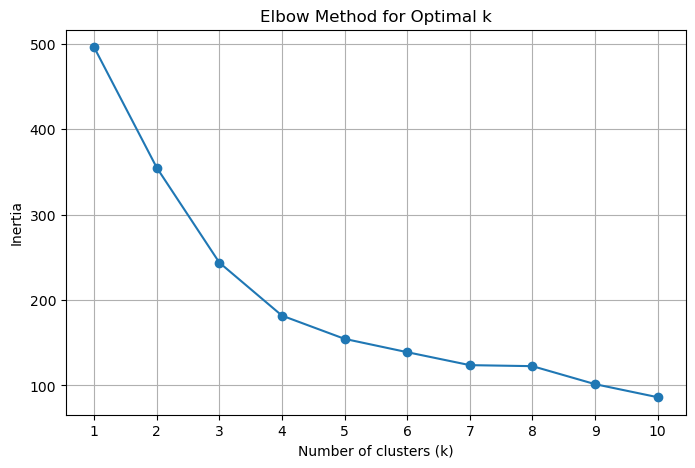

           Country  Cluster
0    United States        2
1            China        0
2   United Kingdom        0
3           Canada        0
4           Israel        0
..             ...      ...
57       Sri Lanka        1
58           Egypt        1
59           Kenya        1
60         Nigeria        1
61        Pakistan        1

[62 rows x 2 columns]


,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group
Cluster,,,,,,,,,,
0,18.885714,16.571429,29.342857,67.6,10.514286,11.971429,42.885714,12.714286,2.371429,1.057143
1,8.230769,6.884615,17.730769,57.0,2.153846,1.653846,21.500000,3.884615,2.807692,2.038462
2,100.000000,100.000000,100.000000,96.0,100.000000,100.000000,83.000000,100.000000,1.000000,1.000000


In [354]:
# Select columns for K-Means
kmeans_columns = df24[['Talent','Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial','Income group']]


# Initialize an empty list to hold inertia values
inertia = []
k_values = range(1, 11)

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Show all k values on x-axis
plt.grid(True)
plt.show()


# Fit K-Means with the chosen number of clusters
optimal_k = 3  # Replaced with k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df24['Cluster'] = kmeans.fit_predict(kmeans_data)

# Display the cluster assignments
print(df24[['Country', 'Cluster']])

# Select only numeric columns for clustering analysis
numeric_cols = df24.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Group by cluster and calculate mean values for each numeric feature
cluster_analysis = df24.groupby('Cluster')[numeric_cols].mean()

# Display the analysis
cluster_analysis

In [355]:
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Total_score_clusters,Research_cluster,Investment_clusters,Innovation_clusters,Implementation_clusters
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,2,1,Liberal democracy,0,1,2,1,2
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3,0,2,Closed autocracy,0,1,3,1,0
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2,0,1,Liberal democracy,0,0,3,0,0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,0,1,Liberal democracy,0,0,3,0,0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,0,1,Liberal democracy,0,0,0,0,0


In [356]:
# Prepare features and target variable
X1 = df.drop(columns= ['Cluster','Country','Political regime']) # Drop 'Cluster' column to get features
y1 = df['Cluster']   # Assign 'Cluster' column as the target variable

In [357]:
# Splitting the data
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [364]:
df24.groupby('Cluster')[['Talent', 'Infrastructure', 'Operating Environment',
           'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].mean().round(2)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
Cluster,,,,,,,,
0,18.89,16.57,29.34,67.6,10.51,11.97,42.89,12.71
1,8.23,6.88,17.73,57.0,2.15,1.65,21.50,3.88
2,100.00,100.00,100.00,96.0,100.00,100.00,83.00,100.00


In [385]:
# Select a random row from df24
random_row = df24.sample(n=1)

# Print the random row
print("Random Row:")
print(random_row)

# Prepare the dummy data point using the random row's values
new_data = pd.DataFrame({
    'Talent': [random_row['Talent'].values[0]],
    'Infrastructure': [random_row['Infrastructure'].values[0]],
    'Operating Environment': [random_row['Operating Environment'].values[0]],
    'Research': [random_row['Research'].values[0]],
    'Development': [random_row['Development'].values[0]],
    'Government Strategy': [random_row['Government Strategy'].values[0]],
    'Commercial': [random_row['Commercial'].values[0]],
    'Total score': [random_row['Total score'].values[0]],
    'Region': [random_row['Region'].values[0]],
    'Income group': [random_row['Income group'].values[0]],
    'Total_score_clusters': [random_row['Total_score_clusters'].values[0]],
    'Research_cluster': [random_row['Research_cluster'].values[0]],
    'Investment_clusters': [random_row['Investment_clusters'].values[0]],
    'Innovation_clusters': [random_row['Innovation_clusters'].values[0]],
    'Implementation_clusters': [random_row['Implementation_clusters'].values[0]]
})

# Make predictions
prediction = grid_xgb.predict(new_data)
probability = grid_xgb.predict_proba(new_data)

# Print the prediction and prediction probability
print(f"Prediction: {prediction[0]}")
print(f"Prediction Probability: {probability[0]}")

# Optional: Extract actual cluster value for comparison
actual_cluster = random_row['Cluster'].values[0]  # Replace 'Cluster' with the actual column name if needed
is_prediction_correct = (prediction[0] == actual_cluster)

# Print whether the prediction is correct
print(f"Actual Cluster: {actual_cluster}")
print(f"Prediction Correct: {is_prediction_correct}")

Random Row:
   Country  Talent  Infrastructure  Operating Environment  Research  \
59   Kenya       4               1                      5        68   

    Development  Government Strategy  Commercial  Total score  Region  \
59            0                    0           2            3       5   

    Cluster  Income group     Political regime  Investment_clusters  \
59        1             3  Electoral autocracy                    0   

    Innovation_clusters  Implementation_clusters  Total_score_clusters  \
59                    0                        0                     0   

    Research_cluster  
59                 1  
Prediction: 1
Prediction Probability: [0.01876962 0.9812304 ]
Actual Cluster: 1
Prediction Correct: True
